#   

# 作業目標:

    1. 藉由固定的 dataset, 來驗證不同loss function
    2. Dataset 的特性跟我們選用的loss function 對accrancy 的影響
    
    
# 作業重點: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate
    

# 導入必要的函數

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

C:\Users\Colt\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [16]:
model = Sequential()

#卷積層1
model.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(32, 32,3),  activation='relu', padding='same'))
model.add(Dropout(rate=0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
#卷積層2與池化層2
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model.add(Dropout(0.25))
model.add(MaxPooling2D(pool_size=(2, 2)))
#建立神經網路(平坦層、隱藏層、輸出層)
model.add(Flatten())
model.add(Dropout(rate=0.25))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(10, activation='softmax'))

#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_10 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_11 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 4096)              0         
__________

In [17]:
model_2 = Sequential()

#卷積層1
model_2.add(Conv2D(filters=32,kernel_size=(3,3), input_shape=(32, 32,3),  activation='relu', padding='same'))
model_2.add(Dropout(rate=0.25))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
#卷積層2與池化層2
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
model_2.add(Dropout(0.25))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
#建立神經網路(平坦層、隱藏層、輸出層)
model_2.add(Flatten())
model_2.add(Dropout(rate=0.25))
model_2.add(Dense(1024, activation='relu'))
model_2.add(Dropout(rate=0.25))
model_2.add(Dense(10, activation='softmax'))

#檢查model 的STACK
print(model_2.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_14 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_15 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4096)              0         
__________

# 載入之前訓練的模型

In [18]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

In [20]:
'''
作業:
請分別選用 "MSE", "binary_crossentropy"
查看Train/test accurancy and loss rate
'''

#模型編譯
#using MSE(mean_squared_error)
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

#using binary _crossentropy
model_2.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [21]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
#model
train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1)         


Instructions for updating:
Use tf.cast instead.
Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 22s 598us/step - loss: 0.0907 - acc: 0.1002 - val_loss: 0.0900 - val_acc: 0.1070
Epoch 2/12
37500/37500 [==============================] - 11s 304us/step - loss: 0.0902 - acc: 0.1040 - val_loss: 0.0898 - val_acc: 0.1160
Epoch 3/12
37500/37500 [==============================] - 11s 305us/step - loss: 0.0900 - acc: 0.1118 - val_loss: 0.0898 - val_acc: 0.1260
Epoch 4/12
37500/37500 [==============================] - 11s 305us/step - loss: 0.0899 - acc: 0.1223 - val_loss: 0.0897 - val_acc: 0.1318
Epoch 5/12
37500/37500 [==============================] - 11s 305us/step - loss: 0.0897 - acc: 0.1229 - val_loss: 0.0896 - val_acc: 0.1505
Epoch 6/12
37500/37500 [==============================] - 11s 305us/step - loss: 0.0896 - acc: 0.1288 - val_loss: 0.0895 - val_acc: 0.1667
Epoch 7/12
37500/37500 [==============================] - 11s 305us/

In [22]:
#模型訓練, "Train_History" 把訓練過程所得到的數值存起來
#model_2
train_history_2=model_2.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.25,
                        epochs=12, batch_size=128, verbose=1) 

Train on 37500 samples, validate on 12500 samples
Epoch 1/12
37500/37500 [==============================] - 12s 326us/step - loss: 0.3256 - acc: 0.9000 - val_loss: 0.3214 - val_acc: 0.9000
Epoch 2/12
37500/37500 [==============================] - 12s 309us/step - loss: 0.3204 - acc: 0.9000 - val_loss: 0.3187 - val_acc: 0.9000
Epoch 3/12
37500/37500 [==============================] - 12s 312us/step - loss: 0.3161 - acc: 0.9000 - val_loss: 0.3153 - val_acc: 0.9000
Epoch 4/12
37500/37500 [==============================] - 12s 314us/step - loss: 0.3114 - acc: 0.9000 - val_loss: 0.3116 - val_acc: 0.9000
Epoch 5/12
37500/37500 [==============================] - 12s 314us/step - loss: 0.3066 - acc: 0.9000 - val_loss: 0.3074 - val_acc: 0.9000
Epoch 6/12
37500/37500 [==============================] - 12s 317us/step - loss: 0.3013 - acc: 0.9001 - val_loss: 0.3030 - val_acc: 0.9000
Epoch 7/12
37500/37500 [==============================] - 12s 315us/step - loss: 0.2962 - acc: 0.9002 - val_loss: 0.

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

#定義一個繪圖函數
def show_train_history(train_hist,train_acc,test_acc):
    plt.plot(train_hist.history[train_acc])
    plt.plot(train_hist.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train_acc', 'val_acc'], loc='upper left')
    plt.show()

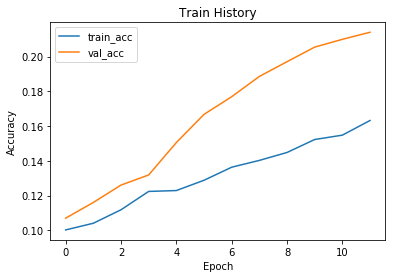

In [24]:
show_train_history(train_history,'acc','val_acc')

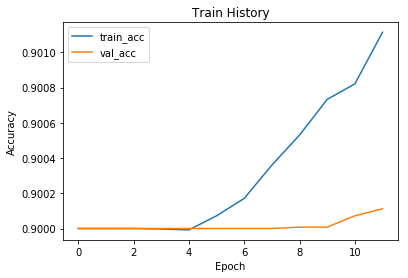

In [25]:
show_train_history(train_history_2,'acc','val_acc')

# 評估模型準確率

In [29]:
scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 133us/step

accuracy= 0.2148


In [30]:
scores = model_2.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

10000/10000 [==============================] - 1s 119us/step

accuracy= 0.9001299766540527
